### Explaination:
- The uploaded file are exluced the original data.
- To run the code successfully, you need to put the data (.csv file) under the same directory with this report.
- Data download address:
    - https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

> The dataset have 303 rows and 14 columns. Each row represent one patient. The target column means wheter a patient have heart disease.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

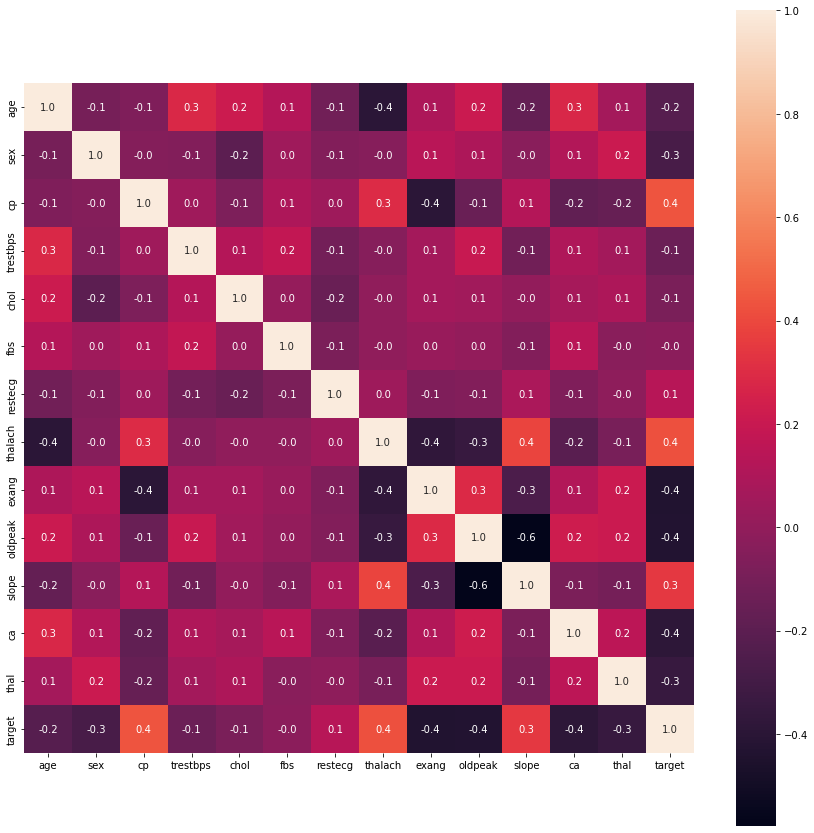

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.1f', square=True)
plt.show()

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

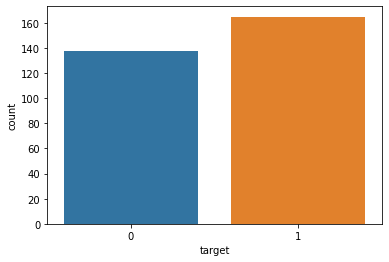

In [15]:
sns.countplot(x='target', data=df)
plt.show()

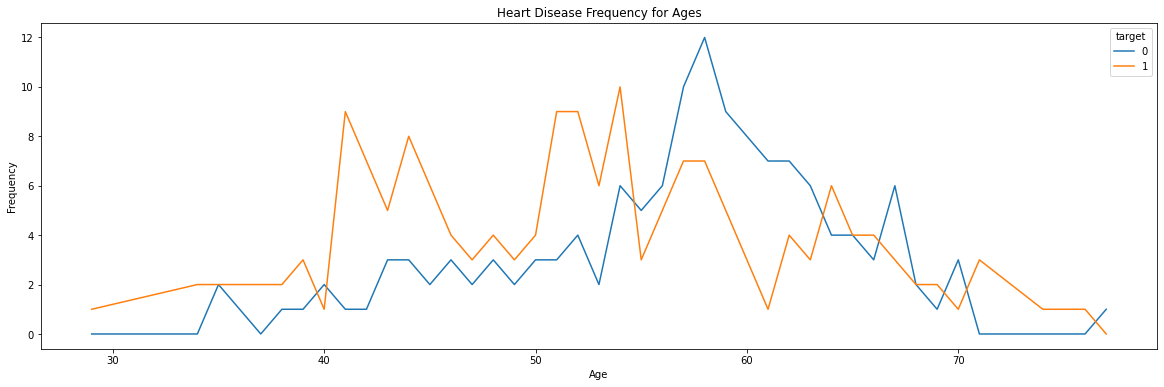

In [21]:
pd.crosstab(df.age, df.target).plot(figsize=(20,6))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Heart Disease Frequency for Ages")
plt.show()

<AxesSubplot:xlabel='target', ylabel='age'>

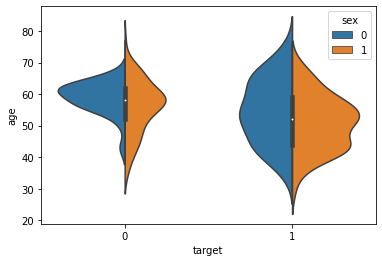

In [24]:
sns.violinplot(x='target', y='age', hue='sex', data=df, split=True)

## preprocessing

In [25]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [27]:
df.columns = ['age', 'sex', 'chest_Pain_Type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
             'rest_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression','st_slope',
             'num_major_vessels', 'thalassemia', 'target']

In [28]:
df.head()

,age,sex,chest_Pain_Type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Handel Norminal data

In [31]:
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})
df['chest_Pain_Type'] = df['chest_Pain_Type'].map({
    0: 'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'lower than 120mg/ml', 1: 'greater than 120mg/ml'})
df['rest_ecg'] = df['rest_ecg'].map({0:'normal', 1:'ST-T wave abnormality', 2:'left ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0: 'no', 1:'yes'})
df['st_slope'] = df['st_slope'].map({0: 'upsloping', 1:'flat', 2: 'downsloping'})
df['thalassemia'] = df['thalassemia'].map({0:'unknown',1:'normal',2:'fixed defect',3:'reversable defect'})

In [32]:
df.head()

,age,sex,chest_Pain_Type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [35]:
df = pd.get_dummies(df)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,num_major_vessels,target,sex_female,sex_male,chest_Pain_Type_asymptomatic,...,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [36]:
df.dtypes

age                                            int64
resting_blood_pressure                         int64
cholesterol                                    int64
max_heart_rate                                 int64
st_depression                                float64
num_major_vessels                              int64
target                                         int64
sex_female                                     uint8
sex_male                                       uint8
chest_Pain_Type_asymptomatic                   uint8
chest_Pain_Type_atypical angina                uint8
chest_Pain_Type_non-anginal pain               uint8
chest_Pain_Type_typical angina                 uint8
fasting_blood_sugar_greater than 120mg/ml      uint8
fasting_blood_sugar_lower than 120mg/ml        uint8
rest_ecg_ST-T wave abnormality                 uint8
rest_ecg_left ventricular hypertrophy          uint8
rest_ecg_normal                                uint8
exercise_induced_angina_no                    

In [37]:
df.to_csv('process_heart.csv',index=False)

In [39]:
from pdpbox import pdp, get_dataset, info_plots

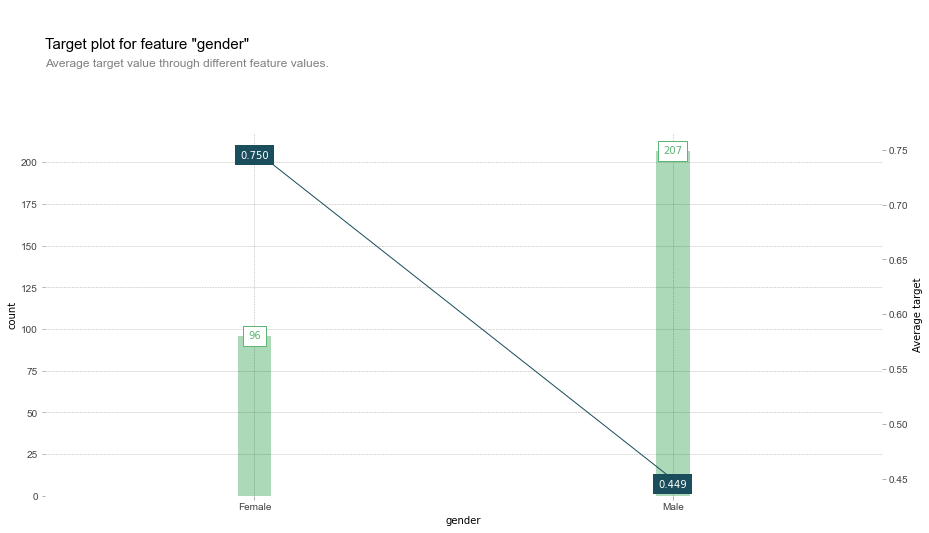

In [45]:
fig, axes, summary_df = info_plots.target_plot(df=df, feature='sex_male', feature_name='gender', target=['target'])
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

In [46]:
# The results based on pd.crosstab(df.sex_male, df.target), and the plot indicates 
# proportion of the heart disease distribution
summary_df

,x,display_column,count,target
0,0,sex_male_0,96,0.750000
1,1,sex_male_1,207,0.449275


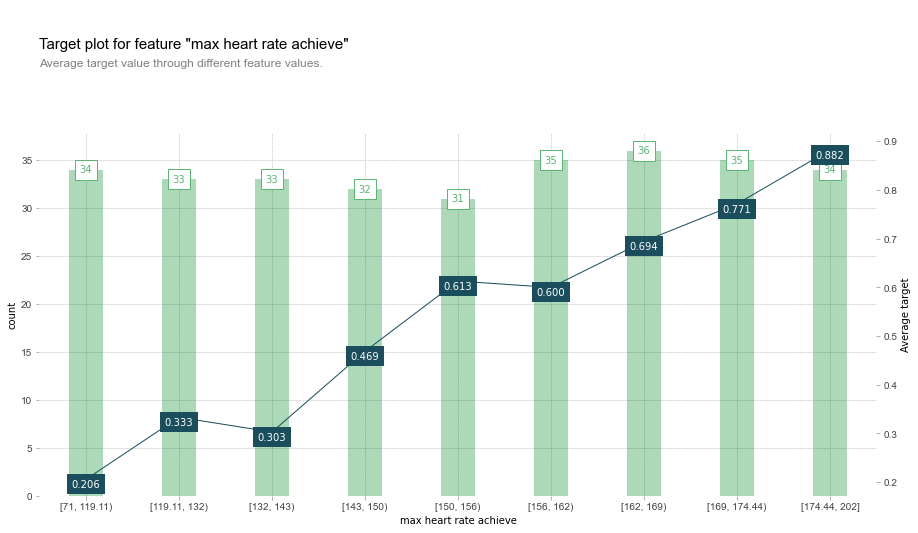

In [48]:
fig, axes, summary_df = info_plots.target_plot(df=df, feature='max_heart_rate', 
                                               feature_name='max heart rate achieve', target=['target'])
# _ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

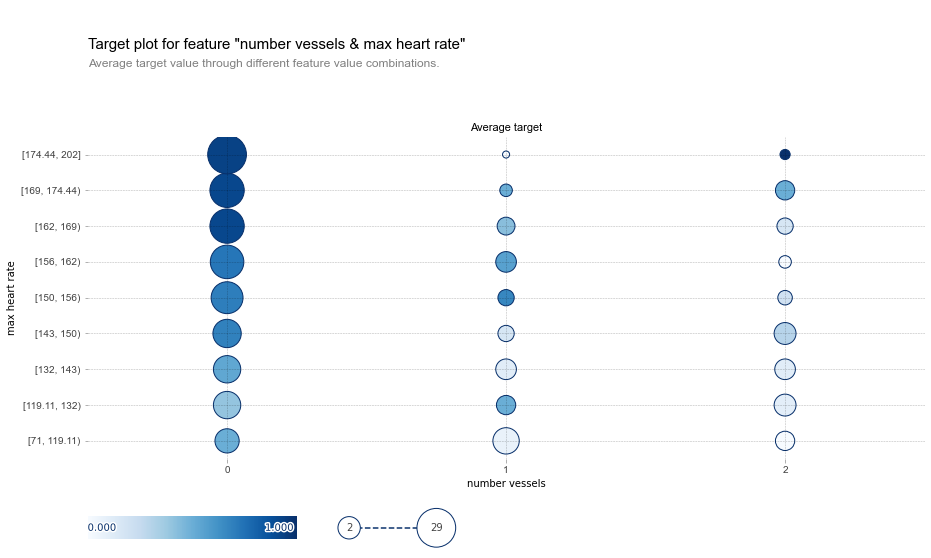

In [54]:
# mutual influence analyzation

fig, axes, summary_df = info_plots.target_plot_interact(
    df=df, features=['num_major_vessels', 'max_heart_rate'], feature_names=['number vessels', 'max heart rate'],
    target='target'
)
_ = axes['value_ax'].set_xticklabels(['0', '1', '2'])